In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Load the dataset
file_path = "testt.csv"  # Update this path if needed
df = pd.read_csv(file_path)

In [52]:
# Display basic information about the dataset
print("\nDataset Overview:\n")
print(df.info())


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [53]:
# Display first few rows
print("\nSample Data:\n")
print(df.head())


Sample Data:

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3      

In [54]:
# Check for missing values
print("\nMissing Values Count:\n")
print(df.isnull().sum())


Missing Values Count:

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [55]:
# Get summary statistics
print("\nStatistical Summary:\n")
print(df.describe())


Statistical Summary:

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [9]:
# Check unique values in categorical columns
print("\nUnique Values in Each Column:\n")
print(df.nunique())


Unique Values in Each Column:

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64


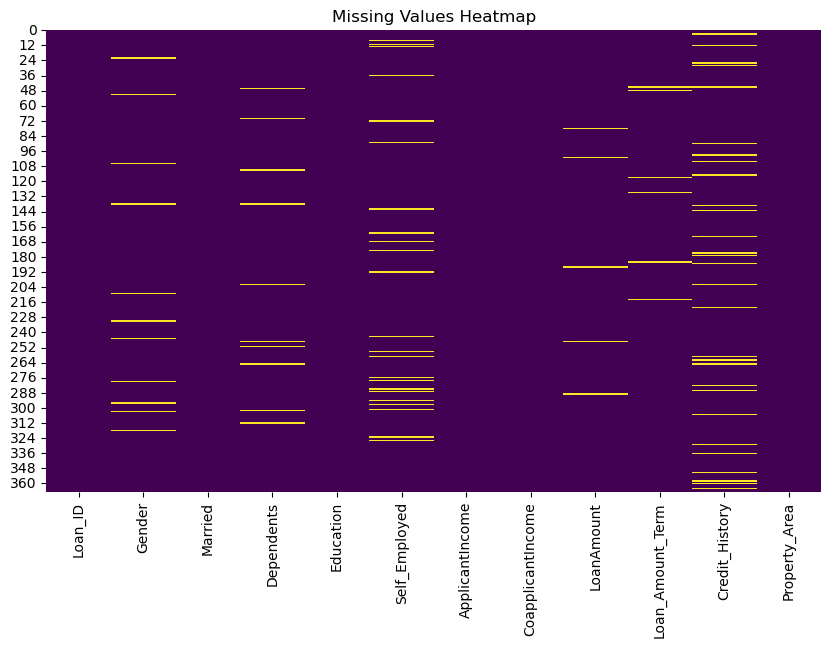

In [10]:
# Visualizing missing values using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
# Fill missing values for numerical columns with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_27208\1432070070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
C:\Users\sandh\AppData\Local\Temp\ipykernel_27208\1432070070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [12]:
# Fill categorical missing values with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_27208\3255932001.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
# Convert categorical variables into numerical (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

In [14]:
# Normalize numerical columns using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("\nPreprocessed Data Sample:\n")
print(df_encoded.head())


Preprocessed Data Sample:

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.078865           0.000000    0.157088          0.746835   
1         0.042411           0.062500    0.187739          0.746835   
2         0.068938           0.075000    0.344828          0.746835   
3         0.032263           0.106083    0.137931          0.746835   
4         0.045168           0.000000    0.095785          0.746835   

   Credit_History  Loan_ID_LP001022  Loan_ID_LP001031  Loan_ID_LP001035  \
0             1.0             False             False             False   
1             1.0              True             False             False   
2             1.0             False              True             False   
3             1.0             False             False              True   
4             1.0             False             False             False   

   Loan_ID_LP001051  Loan_ID_LP001054  ...  Loan_ID_LP002989  Gender_Male  \
0             Fal

#### Step 3: Exploratory Data Analysis

In [20]:
# Ensure plots are displayed inline
%matplotlib inline

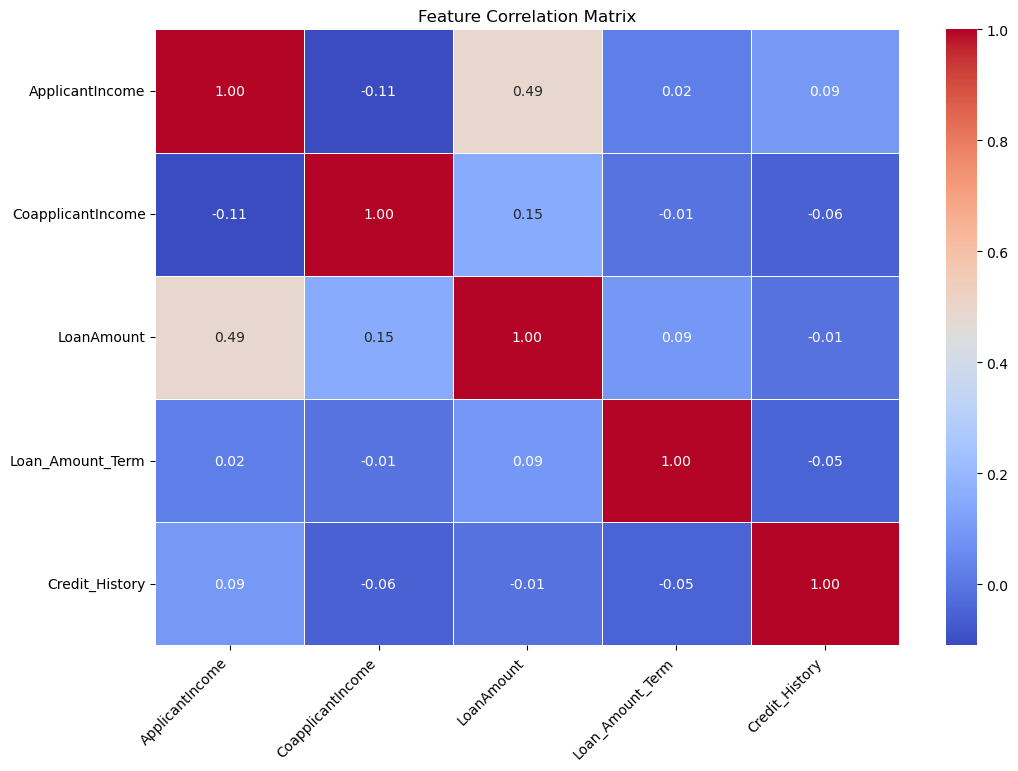

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop 'Loan_ID' if it exists
if 'Loan_ID' in df.columns:
    df.drop(columns=['Loan_ID'], inplace=True)

# Convert categorical variables into numerical (if not already encoded)
df_encoded = pd.get_dummies(df, drop_first=True)

# Drop any remaining non-numeric columns
df_numeric = df_encoded.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Filter out columns with very low variance (zero or near-zero)
low_variance_cols = df_numeric.var()[df_numeric.var() == 0].index
df_numeric.drop(columns=low_variance_cols, inplace=True)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.yticks(rotation=0)
plt.show()

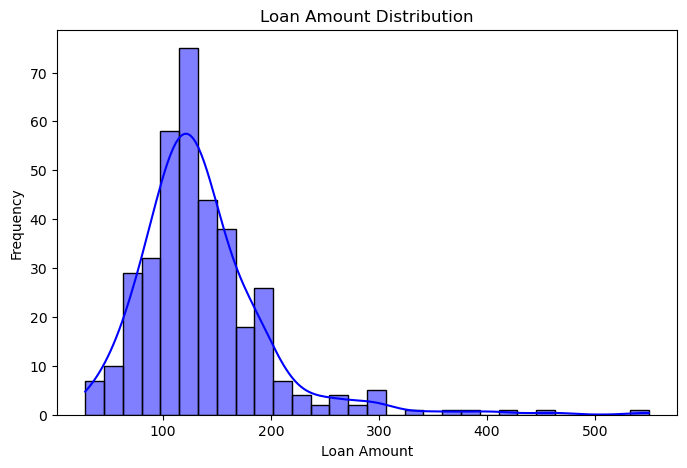

In [16]:
# Loan Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='blue')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

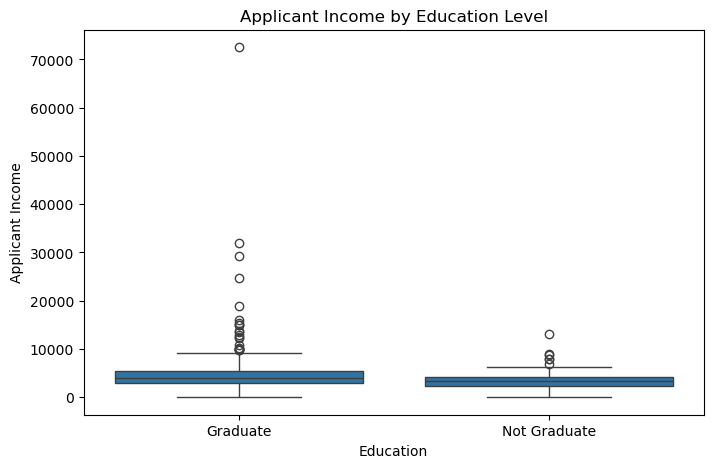

In [17]:
# Boxplot of Applicant Income by Education
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Education'], y=df['ApplicantIncome'])
plt.title("Applicant Income by Education Level")
plt.xlabel("Education")
plt.ylabel("Applicant Income")
plt.show()

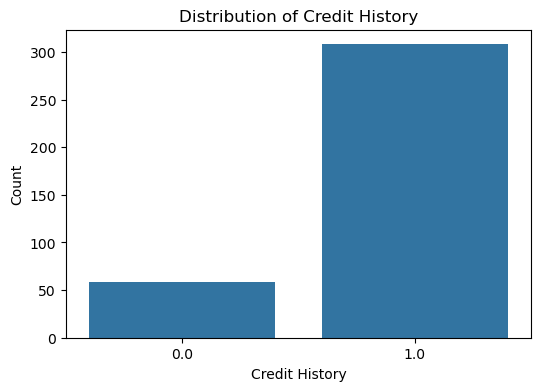

In [18]:
# Countplot of Credit History
plt.figure(figsize=(6,4))
sns.countplot(x=df['Credit_History'])
plt.title("Distribution of Credit History")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.show()

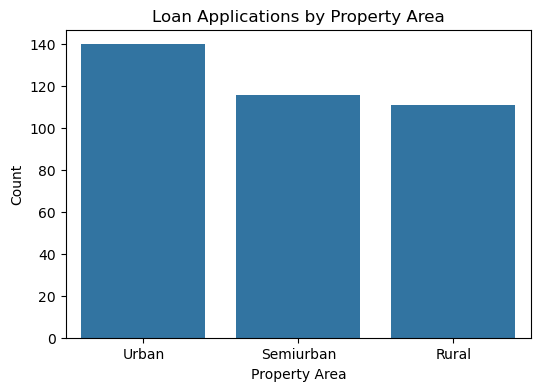

In [19]:
# Countplot of Property Area
plt.figure(figsize=(6,4))
sns.countplot(x=df['Property_Area'])
plt.title("Loan Applications by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Print all column names to check for discrepancies
print("\nColumn names in the dataset:")
print(df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
# Fill missing values for numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Fill missing values for categorical columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Normalize numerical columns
scaler = StandardScaler()
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Define features (X) and target (y)
X = df.drop('Credit_History', axis=1)  # Replace 'Credit_History' with your actual target column name
y = df['Credit_History']  # Replace 'Credit_History' with your actual target column name

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate Logistic Regression Model
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")

In [ ]:
# Evaluate Random Forest Model
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

In [59]:
# Check for overfitting/underfitting by comparing train and test accuracies
train_score_lr = lr_model.score(X_train, y_train)
test_score_lr = lr_model.score(X_test, y_test)

train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)

print(f"Logistic Regression - Train Accuracy: {train_score_lr}, Test Accuracy: {test_score_lr}")
print(f"Random Forest - Train Accuracy: {train_score_rf}, Test Accuracy: {test_score_rf}")

Logistic Regression - Train Accuracy: 0.863481228668942, Test Accuracy: 0.7432432432432432
Random Forest - Train Accuracy: 1.0, Test Accuracy: 0.7432432432432432


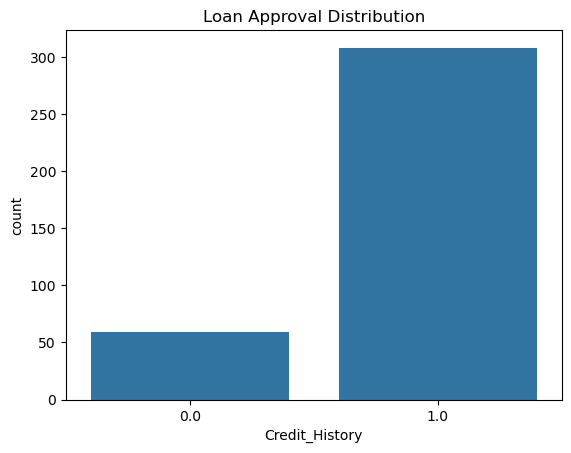

In [62]:
# Visualize the Loan_Status distribution (assuming 'Credit_History' is binary and indicates loan approval status)
sns.countplot(x='Credit_History', data=df)  # Replace 'Credit_History' with your actual target column
plt.title('Loan Approval Distribution')
plt.show()